In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!nvidia-smi

Sun May 22 16:03:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.15       Driver Version: 512.15       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   41C    P0    25W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import torch
torch.cuda.is_available()
#torch.cuda.device_count()

False

In [2]:
import matplotlib.pyplot as plt
from utils import figure_8
from utils import net

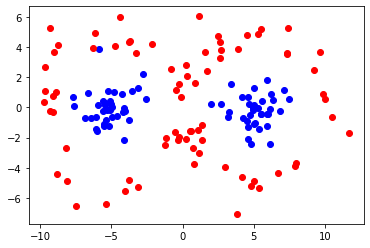

In [3]:
dataset = figure_8(150, var=2)
fig, ax = plt.subplots()
dataset.plot(ax)

In [4]:
net0 = net()

torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([24, 2]) torch.Size([24])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([24, 2]) torch.Size([24])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([24, 2]) torch.Size([24])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([24, 2]) torch.Size([24])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([24, 2]) torch.Size([24])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
t

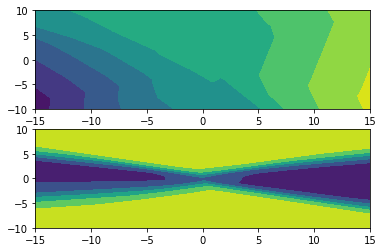

In [11]:
d = dataset.get_dataset()
fig, (ax1, ax2) = plt.subplots(2)
net0.plot_decision_boundary(ax1)
net0.train(d, 500)
net0.plot_decision_boundary(ax2)

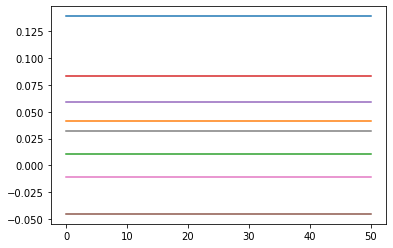

In [4]:
from positive_scaling_invariance import random_telep
from torch import nn
import numpy as np
import torch

net1 = net()
repeats = 50
a, b = 0.5, 1.5

d = dataset.get_dataset()
data = d[:, 1:]
labels = d[:, :1]

outputs = np.empty(shape=(torch.numel(data[:, 0]),2, repeats+1))

outputs[:, :, 0] = net1.forward(data).detach().numpy()

for repeat in range(repeats):
  # for each teleportation, record both outputs values of each datapoint
  random_telep(net1, a, b)
  outputs[:, :, repeat+1] = net1(data).detach().numpy()

x = np.linspace(0, repeats, repeats+1)

for i in [1, 2, 20, 35, 50, 75, 100, 150] :
  plt.plot(x, outputs[i,0, :])
#  plt.plot(x, outputs[i,1, :])

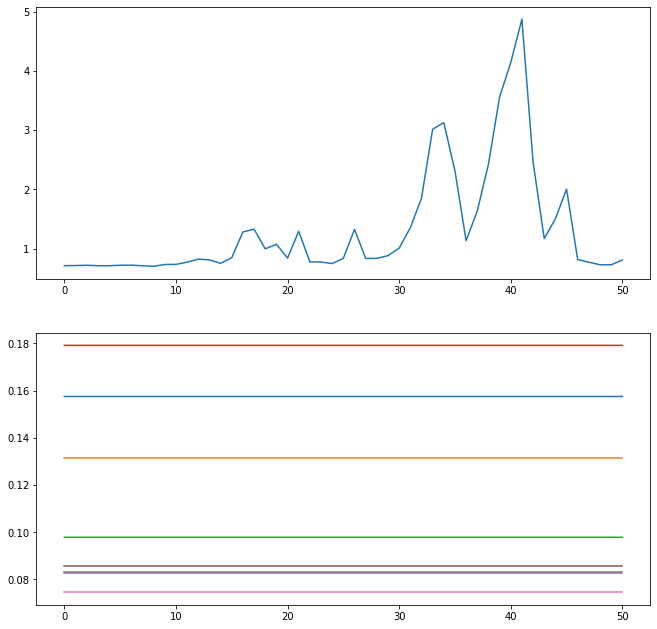

In [4]:
import numpy as np
import torch
from torch  import nn
from torch.optim import Adam
from utils import SAM
from positive_scaling_invariance import random_telep

repeats = 50
a, b = 0.5, 1.5

d = dataset.get_dataset()
data = d[:, 1:]
labels = d[:, :1]

net2 = net()

criterion = nn.CrossEntropyLoss()
optimizer = Adam(net2.parameters())
minimizer = SAM(optimizer, net2, 0.5, 0.01)

res = np.empty(shape=(repeats+1,))
outputs = np.empty(shape=(torch.numel(data[:, 0]),2, repeats+1))


res[0] = minimizer.loss(data, labels, criterion)
outputs[:, :, 0] = net2.forward(data).detach().numpy()

for repeat in range(repeats):
  random_telep(net2, a, b)
  minimizer = SAM(optimizer, net2, 0.5, 0.01)
  res[repeat+1] = minimizer.loss(data, labels, criterion)

  outputs[:, :, repeat+1] = net2(data).detach().numpy()

fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 11))

x = np.linspace(0, repeats, repeats+1)
ax1.plot(x, res)
for i in [1, 2, 20, 35, 50, 75, 100, 150] :
  ax2.plot(x, outputs[i,0, :])

jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False
jhb  False


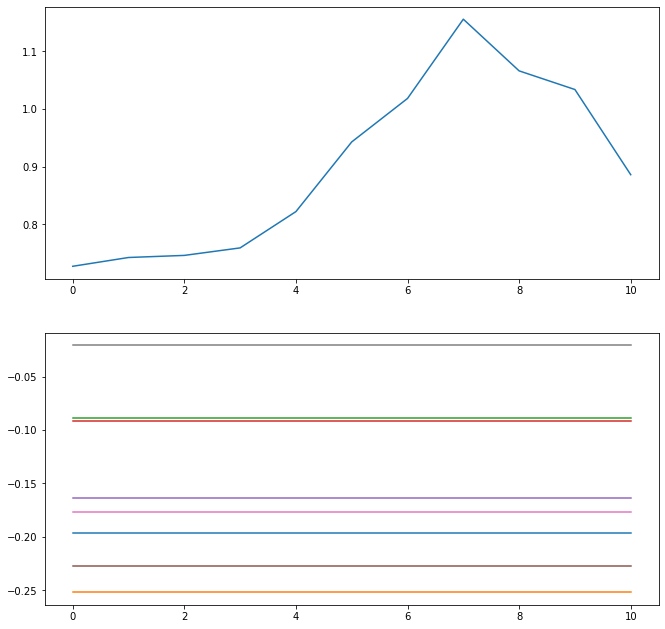

In [11]:
import numpy as np
import torch
from torch  import nn
from torch.optim import Adam
from utils import ASAM
from positive_scaling_invariance import random_telep

repeats = 10
a, b = 0.5, 1.5

d = dataset.get_dataset()
data = d[:, 1:]
labels = d[:, :1]

net3 = net()

criterion = nn.CrossEntropyLoss()
optimizer = Adam(net3.parameters())
minimizer = ASAM(optimizer, net3, 0.5, 0.01)

res = np.empty(shape=(repeats+1,))
outputs = np.empty(shape=(torch.numel(data[:, 0]),2, repeats+1))


res[0] = minimizer.loss(data, labels, criterion)
outputs[:, :, 0] = net3.forward(data).detach().numpy()

for repeat in range(repeats):
  random_telep(net3, a, b)
  minimizer = ASAM(optimizer, net3, 0.5, 0.01)
  res[repeat+1] = minimizer.loss(data, labels, criterion)

  outputs[:, :, repeat+1] = net3(data).detach().numpy()

fig, (ax1, ax2) = plt.subplots(2, figsize=(11, 11))

x = np.linspace(0, repeats, repeats+1)
ax1.plot(x, res)
for i in [1, 2, 20, 35, 50, 75, 100, 150] :
  ax2.plot(x, outputs[i,0, :])